# Práctica 1: webscraping y visualización

**Objetivo de la práctica**: recopilar, estructurar, limpiar y procesar datos de Internet.

*Se darán por válidas las soluciones con BeautifulSoup y regex*  

**Autor(es)**
- Nombre 1
- Nombre 2
- ...

---

In [15]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parte 1: recopilación y estructuración del dataset

Crea un DataFrame con los datos de la url especificada en la constante `URL` y los nombres de columnas recogidos en la lista `column_names`. Utiliza el siguiente como ejemplo:


| Pais                  | Capital          | Poblacion | Area |
|-----------------------|------------------|-----------|------------|
| Andorra               | Andorra la Vella| 84000     | 468.0      |
| United Arab Emirates  | Abu Dhabi        | 4975593   | 82880.0    |
| Afghanistan           | Kabul            | 29121286  | 647500.0   |
| Antigua and Barbuda   | St. John's       | 86754     | 443.0      |
| Anguilla              | The Valley       | 13254     | 102.0      |
| Albania               | Tirana           | 2986952   | 28748.0    |


In [16]:
URL = "http://scrap.coredumped.es"

# nombres de las columnas del dataframe, así tenemos todos los mismos
column_names = ['Pais', 'Capital', 'Poblacion', 'Area']

In [17]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


web = requests.get(URL)
soup = BeautifulSoup(web.text)


soup


#df = pd.DataFrame(URL, columns = column_names)

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>PaÃ­ses del Mundo: Un Ejemplo Simple</title>
<link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
<link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
<meta content="noindex" name="robots"/>
<link href="https://lipis.github.io/flag-icon-css/css/flag-icon.css" rel="st

In [18]:
import pandas as pd

# Define URL and column names
URL = "http://scrap.coredumped.es"
column_names = ['Pais', 'Capital', 'Poblacion', 'Area']


In [24]:
# Imports (already done previously)
# import requests
# from bs4 import BeautifulSoup
import requests
from bs4 import BeautifulSoup
# Get the webpage content
web = requests.get(URL)
soup = BeautifulSoup(web.text, "html.parser")  # Parse with HTML parser #"lxml"

data = []

table = soup.find('table')


df = pd.DataFrame(data, columns=column_names)
df

# col-md-4 country
countries = soup.find_all("div", class_="col-md-4 country")

print(f"Hay {len(countries)} paises")

print(df)


Hay 250 paises
Empty DataFrame
Columns: [Pais, Capital, Poblacion, Area]
Index: []


In [27]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL de la cual vamos a extraer los datos
URL = "http://scrap.coredumped.es"

# Nombres de las columnas del dataframe
column_names = ['Pais', 'Capital', 'Poblacion', 'Area']

# Realiza una solicitud GET para obtener el contenido de la página web
web = requests.get(URL)

# Analiza el contenido HTML con BeautifulSoup
soup = BeautifulSoup(web.text, 'html.parser')

# Inicializa una lista para almacenar los datos
data = []

rows = table.find_all('tr')


for row in rows:
    # celdas de la fila (menos la primera, que es el indice)
    cells = row.find_all('td')[1:]
    # Extraer el texto de cada celda y añadirlo a la lista de datos
    data.append([cell.get_text(strip=True) for cell in cells])

# Crear un DataFrame de Pandas con los datos
df = pd.DataFrame(data, columns=column_names)
# Crea un DataFrame de pandas utilizando los datos extraídos y los nombres de las columnas
df = pd.DataFrame(data, columns=column_names)

# Muestra el DataFrame
print(df)


AttributeError: 'NoneType' object has no attribute 'find_all'

In [47]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

URL = "http://scrap.coredumped.es"

web = requests.get(URL)

soup = BeautifulSoup('html.parser')

data = []

divs = soup.find_all('div')

for div in divs:
    if div.get_text(strip=True):
        data.append(div.get_text(strip=True))

rows = [data[i:i+4] for i in range(0, len(data), 4)]

df = pd.DataFrame(rows, columns=['Pais', 'Capital', 'Poblacion', 'Area'])
df


,Pais,Capital,Poblacion,Area


# Parte 2: limpieza del dataset


2a) Elimina los valores nulos, si los hubiera. Si los hubiera, ¿destruirías la fila entera o sustituirías el valor nulo por 0?

In [32]:
df_sin_nulos = df.fillna(0)
df

,Pais,Capital,Poblacion,Area
0,PaÃ­ses del Mundo: un Ejemplo Simple250 itemsE...,PaÃ­ses del Mundo: un Ejemplo Simple250 itemsE...,PaÃ­ses del Mundo: un Ejemplo Simple250 items,PaÃ­ses del Mundo: un Ejemplo Simple250 items
1,En esta pÃ¡gina podrÃ©is encontrar informaciÃ³...,En esta pÃ¡gina podrÃ©is encontrar informaciÃ³...,AndorraCapital:Andorra la VellaPopulation:8400...,AndorraCapital:Andorra la VellaPopulation:8400...
2,Capital:Andorra la VellaPopulation:84000Area (...,United Arab EmiratesCapital:Abu DhabiPopulatio...,Capital:Abu DhabiPopulation:4975593Area (km2):...,AfghanistanCapital:KabulPopulation:29121286Are...
3,Capital:KabulPopulation:29121286Area (km2):647...,Antigua and BarbudaCapital:St. John'sPopulatio...,Antigua and BarbudaCapital:St. John'sPopulatio...,Capital:St. John'sPopulation:86754Area (km2):4...
4,AnguillaCapital:The ValleyPopulation:13254Area...,Capital:The ValleyPopulation:13254Area (km2):1...,AlbaniaCapital:TiranaPopulation:2986952Area (k...,Capital:TiranaPopulation:2986952Area (km2):287...
...,...,...,...,...
144,KosovoCapital:PristinaPopulation:1800000Area (...,Capital:PristinaPopulation:1800000Area (km2):1...,YemenCapital:SanaaPopulation:23495361Area (km2...,Capital:SanaaPopulation:23495361Area (km2):527...
145,MayotteCapital:MamoudzouPopulation:159042Area ...,MayotteCapital:MamoudzouPopulation:159042Area ...,Capital:MamoudzouPopulation:159042Area (km2):3...,South AfricaCapital:PretoriaPopulation:4900000...
146,Capital:PretoriaPopulation:49000000Area (km2):...,ZambiaCapital:LusakaPopulation:13460305Area (k...,Capital:LusakaPopulation:13460305Area (km2):75...,ZimbabweCapital:HararePopulation:11651858Area ...
147,ZimbabweCapital:HararePopulation:11651858Area ...,Capital:HararePopulation:11651858Area (km2):39...,Core Dumped Academy; 2024,Core Dumped Academy; 2024


(respuesta de texto aquí)

2b) Asegura que las columnas `País` y `Capital` son de tipo `str`.

In [34]:
df['Pais'] = df['Pais'].astype(str)
df['Capital'] = df['Capital'].astype(str)


2c) Aplica el mismo procedimiento para las columnas numéricas `Poblacion` y `Area`

In [38]:
df['Poblacion'] = df['Poblacion'].astype(int)
df['Area'] = df['Area'].astype(int)

ValueError: invalid literal for int() with base 10: 'PaÃ\xadses del Mundo: un Ejemplo Simple250 items'

# Parte 3: procesamiento del dataset


3a) Añade la siguiente columna derivada al dataset:
- Densidad de población (Habitantes/km^2)


In [37]:
df['Densidad'] = df['Poblacion'] / df['Area']

TypeError: unsupported operand type(s) for /: 'str' and 'str'

3b) Representa la distribución de la variable `Poblacion`.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


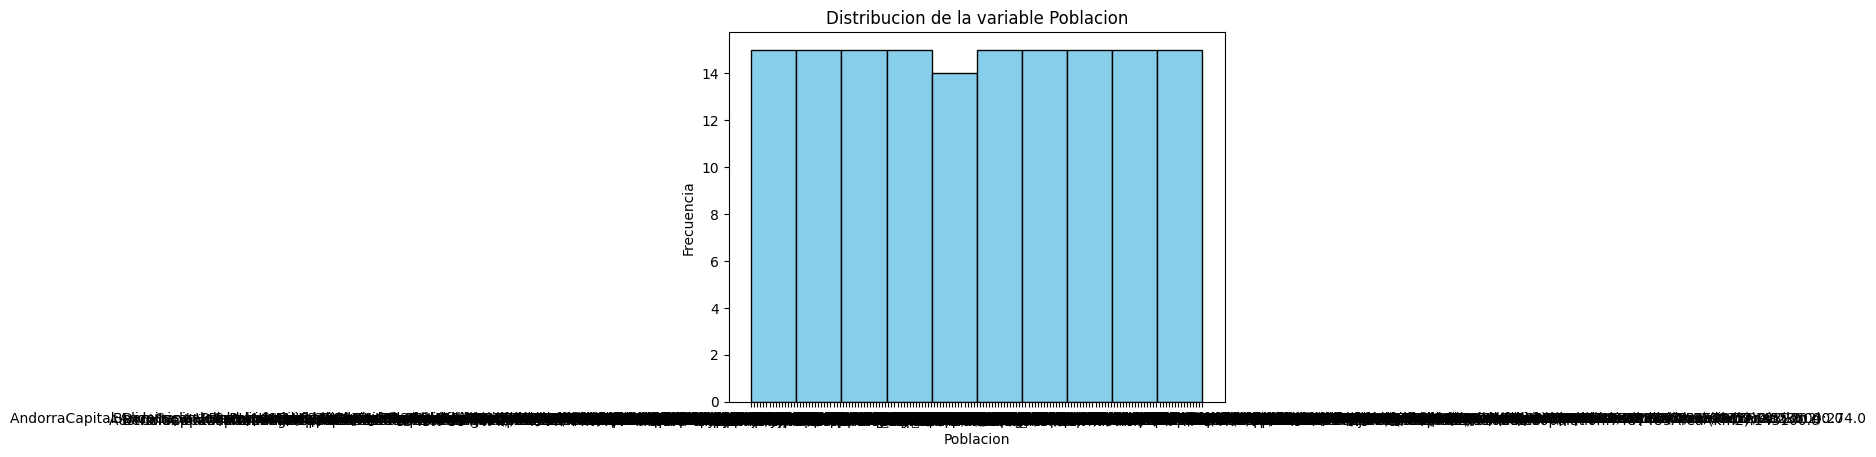

In [39]:
import matplotlib.pyplot as plt

plt.hist(df['Poblacion'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Poblacion')
plt.ylabel('Frecuencia')
plt.title('Distribucion de la variable Poblacion')

plt.show()


3c) ¿Existe alguna correlación entre las variables `Poblacion` y `Area`? Justifica tu respuesta.

In [40]:
correlation = df['Poblacion'].corr(df['Area'])

print("Coeficiente de correlacion de Pearson:", correlation)

if correlation > 0:
    print("Existe una correlacion positiva entre Poblacion y Area.")
elif correlation < 0:
    print("Existe una correlacion negativa entre Poblacion y Area.")
else:
    print("No existe una correlacion lineal entre Poblacion y Area.")


TypeError: unsupported operand type(s) for /: 'str' and 'int'